In [27]:
import kwant
# For plotting
from matplotlib import pyplot
import matplotlib.backends

In [28]:

def make_system(a=1, t=1.0, W=10, L=30):
    # Start with an empty tight-binding system and a single square lattice.
    # `a` is the lattice constant (by default set to 1 for simplicity.
    lat = kwant.lattice.square(a)
    syst = kwant.Builder()
    
    syst[(lat(x, y) for x in range(L) for y in range(W))] = 4 * t

    kwant.plot(syst);

    syst[lat.neighbors()] = -t

    kwant.plot(syst);

    sym = kwant.TranslationalSymmetry((-a,0))
    lead = kwant.Builder(sym)
    lead[(lat(0,j) for j in range(W))] = 4*t
    lead[lat.neighbors()] = -t

    syst.attach_lead(lead)
    kwant.plot(syst);
    syst.attach_lead(lead.reversed())
    kwant.plot(syst);

    return syst


In [29]:
def plot_conductance(syst, energies):
    # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))
        
    pyplot.figure()
    pyplot.plot(energies, data)
    pyplot.xlabel("energy [t]")
    pyplot.ylabel("conductance [e^2/h]")
    pyplot.show()


In [30]:
def main():
    syst = make_system()

    kwant.plot(syst);

    syst = syst.finalized()

    plot_conductance(syst, energies= [0.01*i for i in range(100)])
    

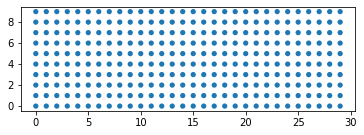

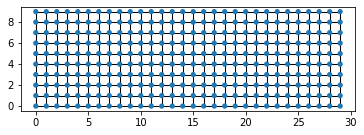

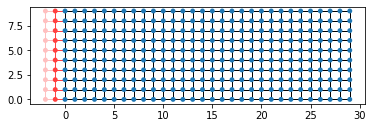

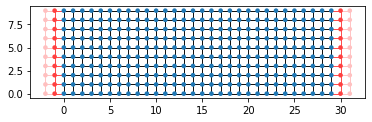

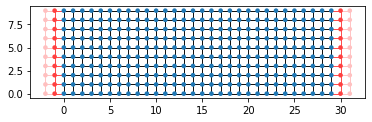

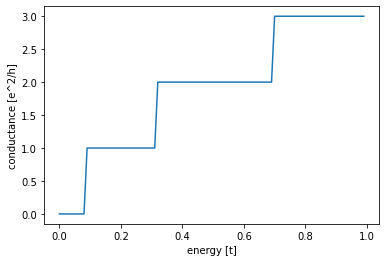

In [31]:
if __name__ == '__main__':
    main()